# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

In [12]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [14]:
#make a dataframe to hold the city weather information
weather_df = pd.DataFrame(cities)
weather_df

,0
0,kidal
1,bluff
2,new norfolk
3,ca mau
4,yellowknife
...,...
582,valleyview
583,haibowan
584,chimbote
585,oil city


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=b20144e5eabe2a61daa117f61ac4be5c&units=metric&q='

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:

counter = 1

for index, row in weather_df.iterrows():
    city = row[0]
    response = requests.get(query_url + city).json()
    try:     
        weather_df.loc[index, 'temp'] = response['main']['temp']
        weather_df.loc[index, 'lat'] = response['coord']['lat']
        weather_df.loc[index, 'lon'] = response['coord']['lon']
        weather_df.loc[index, 'hum'] = response['main']['humidity']
        weather_df.loc[index, 'cloud'] = response['clouds']['all']
        weather_df.loc[index, 'wind'] = response['wind']['speed']
        
        #temps.append(response['main']['temp'])
        #lat.append(response['coord']['lat'])
        #hum.append(response['main']['humidity'])
        #cloud.append(response['clouds']['all'])
        #wind.append(response['wind']['speed'])
        
        print(f"Processing record {counter}, {city}")
        counter = counter + 1
    except (KeyError):
        print("Missing result...skipping.")
        
    

Processing record 1, kidal
Processing record 2, bluff
Processing record 3, new norfolk
Processing record 4, ca mau
Processing record 5, yellowknife
Processing record 6, anadyr
Processing record 7, sungaipenuh
Processing record 8, bethel
Missing result...skipping.
Processing record 9, jalu
Processing record 10, rikitea
Processing record 11, sokyryany
Processing record 12, hermanus
Processing record 13, iqaluit
Processing record 14, alofi
Processing record 15, si bun ruang
Processing record 16, airai
Processing record 17, brake
Processing record 18, vaini
Processing record 19, port alfred
Processing record 20, la ronge
Processing record 21, provideniya
Processing record 22, dzhubga
Processing record 23, batemans bay
Processing record 24, bengkulu
Processing record 25, puerto ayora
Processing record 26, butaritari
Processing record 27, busselton
Processing record 28, talnakh
Processing record 29, jamestown
Missing result...skipping.
Processing record 30, upernavik
Processing record 31, ke

Processing record 239, kathu
Processing record 240, iclod
Processing record 241, cidreira
Processing record 242, soyo
Processing record 243, biak
Processing record 244, waverly
Processing record 245, itarema
Processing record 246, syamzha
Processing record 247, hambantota
Processing record 248, lubango
Processing record 249, southampton
Processing record 250, tautira
Processing record 251, kaeo
Processing record 252, bandarbeyla
Processing record 253, mandalgovi
Processing record 254, tilichiki
Processing record 255, tessalit
Processing record 256, camana
Processing record 257, bose
Processing record 258, avera
Processing record 259, cabo san lucas
Missing result...skipping.
Processing record 260, port hardy
Processing record 261, los llanos de aridane
Processing record 262, samarai
Processing record 263, yar-sale
Processing record 264, seoul
Processing record 265, hami
Processing record 266, torbay
Processing record 267, allapalli
Processing record 268, cameta
Processing record 269, k

Processing record 484, lumeje
Processing record 485, cap malheureux
Processing record 486, taoudenni
Processing record 487, aleksandrov gay
Processing record 488, abu zabad
Processing record 489, lexington
Processing record 490, clyde river
Processing record 491, flagstaff
Missing result...skipping.
Processing record 492, ambovombe
Processing record 493, cedar city
Processing record 494, lasa
Processing record 495, kaniama
Processing record 496, aberdeen
Processing record 497, plettenberg bay
Missing result...skipping.
Processing record 498, emerald
Processing record 499, teya
Processing record 500, donskoye
Processing record 501, nkongsamba
Processing record 502, champerico
Processing record 503, olinda
Processing record 504, lago da pedra
Processing record 505, gannan
Processing record 506, sur
Processing record 507, impfondo
Processing record 508, mehamn
Processing record 509, caravelas
Processing record 510, esperance
Processing record 511, miramar
Processing record 512, andrews
Pr

In [17]:
weather_df

,0,temp,lat,lon,hum,cloud,wind
0,kidal,23.52,18.44,1.41,9.0,0.0,2.15
1,bluff,13.89,-46.60,168.33,85.0,100.0,5.36
2,new norfolk,11.99,-42.78,147.06,62.0,75.0,2.60
3,ca mau,22.96,9.18,105.15,93.0,100.0,1.88
4,yellowknife,-17.48,62.46,-114.35,64.0,40.0,4.10
...,...,...,...,...,...,...,...
582,valleyview,1.72,55.07,-117.29,73.0,0.0,6.07
583,haibowan,NaN,NaN,NaN,NaN,NaN,NaN
584,chimbote,27.37,-9.09,-78.58,58.0,56.0,6.15
585,oil city,6.95,41.43,-79.71,93.0,90.0,6.20


In [120]:
#make the weather_df into a csv file
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)
weather_df.to_csv(r'weather.csv', index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature')

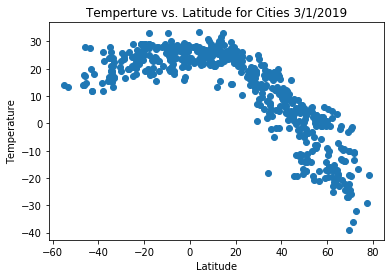

In [18]:
x_values = weather_df['lat']
y_values = weather_df['temp']
plt.scatter(x_values, y_values)
plt.title("Temperture vs. Latitude for Cities 3/1/2019")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

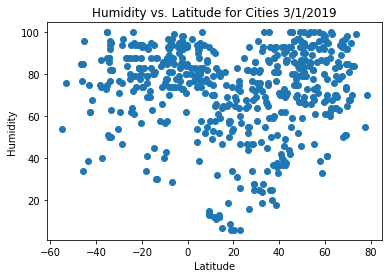

In [19]:
x_values = weather_df['lat']
y_values = weather_df['hum']
plt.scatter(x_values, y_values)
plt.title("Humidity vs. Latitude for Cities 3/1/2019")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

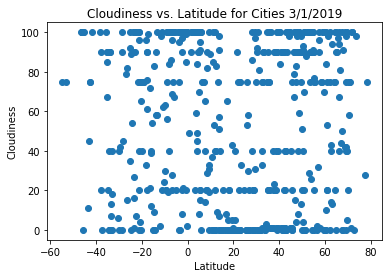

In [20]:
x_values = weather_df['lat']
y_values = weather_df['cloud']
plt.scatter(x_values, y_values)
plt.title("Cloudiness vs. Latitude for Cities 3/1/2019")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

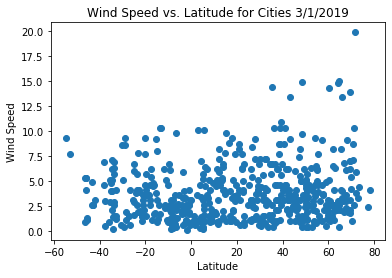

In [21]:
x_values = weather_df['lat']
y_values = weather_df['wind']
plt.scatter(x_values, y_values)
plt.title("Wind Speed vs. Latitude for Cities 3/1/2019")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

## Linear Regression

def x_y():
    x_min = x_values.min()
    y_min = y_values.min()
x_values.min()

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots
# Perform a linear regression on temperature vs. latitude
from scipy import stats
    
def lin_reg():
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    
    #plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction', fonstsize=15, color='red')
    plt.annotate(line_eq, xy=(x_values.min(),y_values.min()), fontsize=15,color="red")
    
    #plt.legend(line_eq, loc='best', fontsize='small', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
    #Print r square value
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    print(regress_values)

In [36]:
# Create Northern and Southern Hemisphere DataFrames
#example from stackoverflow: cust_sell = mainDf[mainDf.Type == 'S']
northern_df = weather_df[weather_df.lat >= 0]
#northern_df
southern_df = weather_df[weather_df.lat < 0]
southern_df

,0,temp,lat,lon,hum,cloud,wind
1,bluff,13.89,-46.60,168.33,85.0,100.0,5.36
2,new norfolk,11.99,-42.78,147.06,62.0,75.0,2.60
6,sungaipenuh,16.86,-2.08,101.38,98.0,100.0,1.10
10,rikitea,26.76,-23.12,-134.97,79.0,100.0,7.83
12,hermanus,20.86,-34.42,19.23,86.0,0.0,4.02
...,...,...,...,...,...,...,...
565,labrea,28.48,-7.26,-64.80,87.0,86.0,0.73
577,sao felix do xingu,27.74,-6.64,-51.99,81.0,69.0,1.28
579,conceicao do araguaia,26.98,-8.26,-49.26,89.0,100.0,0.63
581,karratha,29.03,-20.74,116.85,78.0,4.0,2.14


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8877461962162406
y = -0.71x +34.12
0      21.036040
3      27.604432
4     -10.188646
5     -11.813010
7       4.771114
         ...    
578     8.140429
580     6.416759
582    -4.946700
585     4.728554
586    -1.392960
Name: lat, Length: 369, dtype: float64


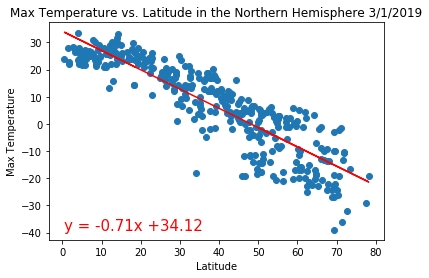

In [37]:
x_values = northern_df['lat']
y_values = northern_df['temp']
plt.scatter(x_values,y_values)
plt.title('Max Temperature vs. Latitude in the Northern Hemisphere 3/1/2019')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
lin_reg()
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5306751205609548
y = 0.19x +26.91
1      18.223912
2      18.936021
6      26.523151
10     22.600959
12     20.494458
         ...    
565    25.557516
577    25.673094
579    25.371100
581    23.044629
584    25.216375
Name: lat, Length: 173, dtype: float64


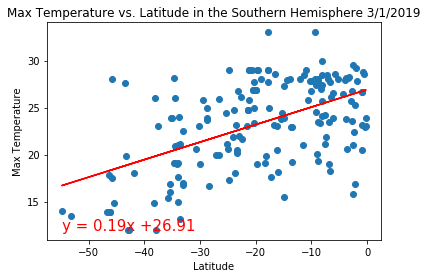

In [38]:
x_values = southern_df['lat']
y_values = southern_df['temp']
plt.scatter(x_values,y_values)
plt.title('Max Temperature vs. Latitude in the Southern Hemisphere 3/1/2019')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
lin_reg()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2593918908734407
y = 0.29x +59.23
0      64.549105
3      61.879524
4      77.239705
5      77.899893
7      71.159633
         ...    
578    69.790248
580    70.490796
582    75.109229
585    71.176931
586    73.664888
Name: lat, Length: 369, dtype: float64


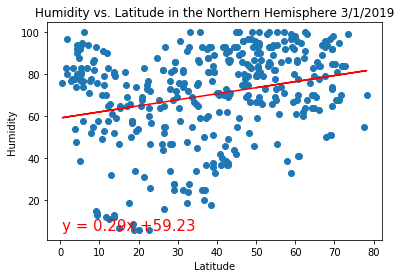

In [39]:
x_values = northern_df['lat']
y_values = northern_df['hum']
plt.scatter(x_values,y_values)
plt.title('Humidity vs. Latitude in the Northern Hemisphere 3/1/2019')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
lin_reg()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17171638247429397
y = 0.21x +83.0
1      73.362542
2      74.152226
6      82.565873
10     78.216410
12     75.880435
         ...    
565    81.495045
577    81.623214
579    81.288322
581    78.708412
584    81.116741
Name: lat, Length: 173, dtype: float64


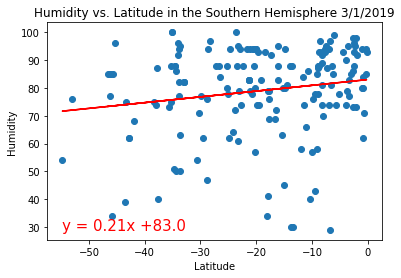

In [40]:
x_values = southern_df['lat']
y_values = southern_df['hum']
plt.scatter(x_values,y_values)
plt.title('Humidity vs. Latitude in the Southern Hemisphere 3/1/2019')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
lin_reg()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15423990819976027
y = 0.31x +37.04
0      42.700468
3      39.858372
4      56.211166
5      56.914017
7      49.738185
         ...    
578    48.280307
580    49.026127
582    53.943014
585    49.756601
586    52.405336
Name: lat, Length: 369, dtype: float64


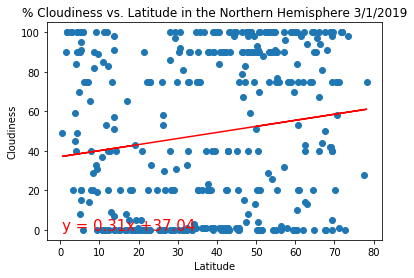

In [41]:
x_values = northern_df['lat']
y_values = northern_df['cloud']
plt.scatter(x_values,y_values)
plt.title('% Cloudiness vs. Latitude in the Northern Hemisphere 3/1/2019')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
lin_reg()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14890939157245534
y = 0.42x +69.52
1      49.745415
2      51.366468
6      68.637900
10     59.709376
12     54.914113
         ...    
565    66.439718
577    66.702820
579    66.015358
581    60.719351
584    65.663140
Name: lat, Length: 173, dtype: float64


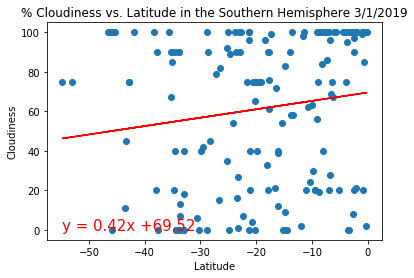

In [42]:
x_values = southern_df['lat']
y_values = southern_df['cloud']
plt.scatter(x_values,y_values)
plt.title('% Cloudiness vs. Latitude in the Southern Hemisphere 3/1/2019')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
lin_reg()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12763901568092106
y = 0.02x +3.28
0      3.630263
3      3.455369
4      4.461670
5      4.504922
7      4.063343
         ...   
578    3.973629
580    4.019525
582    4.322095
585    4.064476
586    4.227471
Name: lat, Length: 369, dtype: float64


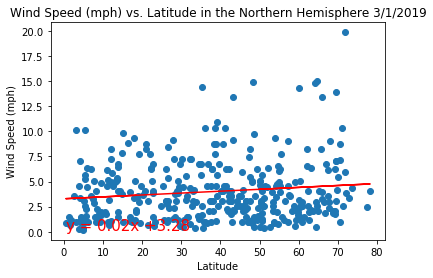

In [43]:
x_values = northern_df['lat']
y_values = northern_df['wind']
plt.scatter(x_values,y_values)
plt.title('Wind Speed (mph) vs. Latitude in the Northern Hemisphere 3/1/2019')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
lin_reg()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2577939173435197
y = -0.05x +2.45
1      4.556208
2      4.383917
6      2.548251
10     3.497204
12     4.006861
         ...   
565    2.781881
577    2.753917
579    2.826983
581    3.389861
584    2.864418
Name: lat, Length: 173, dtype: float64


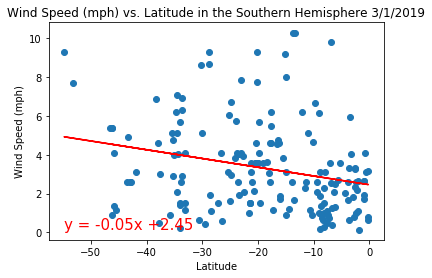

In [44]:
x_values = southern_df['lat']
y_values = southern_df['wind']
plt.scatter(x_values,y_values)
plt.title('Wind Speed (mph) vs. Latitude in the Southern Hemisphere 3/1/2019')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
lin_reg()
plt.show()